In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
# from tensorflow.keras.layers.normalization import BatchNormalization
import os
import seaborn as sns
from keras.applications import MobileNetV2
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from sklearn import preprocessing

In [2]:
SIZE=224

In [3]:
train_images, train_labels = [], []
for directory_path in glob.glob("Training/*"):
    tr_label = directory_path.split("\\")[-1]
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        train_images.append(img)
        train_labels.append(tr_label)

In [4]:
test_images, test_labels = [], []
for directory_path in glob.glob("Testing/*"):
    ts_label = directory_path.split("\\")[-1]
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        test_images.append(img)
        test_labels.append(ts_label)

In [5]:
# Convert images and labels to numpy arrays
x_train = np.array(train_images)
y_train = np.array(train_labels)
x_test = np.array(test_images)
y_test = np.array(test_labels)

In [6]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((8406, 224, 224, 3), (8406,), (2104, 224, 224, 3), (2104,))

In [7]:
# Encode labels from text to integers
label_encoder = preprocessing.LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# One-hot encode y values for the neural network
from keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train_encoded, num_classes=5)
y_test_one_hot = to_categorical(y_test_encoded, num_classes=5)

In [8]:
x_train.shape, y_train_one_hot.shape, x_test.shape, y_test_one_hot.shape

((8406, 224, 224, 3), (8406, 5), (2104, 224, 224, 3), (2104, 5))

In [9]:
base_model = MobileNetV2(input_shape=(224, 224,3), include_top=False, weights="imagenet")

In [10]:
from tensorflow.keras import layers 
import tensorflow as tf
for layer in base_model.layers:
    layer.trainable = False

In [11]:
base_model.trainable=False
model=Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(5,activation='softmax'))

In [12]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
history = model.fit(x_train, y_train_one_hot, epochs=50, batch_size=32)

Epoch 1/50
263/263 [==============================] - 121s 452ms/step - loss: 0.8807 - accuracy: 0.9220
Epoch 2/50
263/263 [==============================] - 121s 461ms/step - loss: 0.1823 - accuracy: 0.9736
Epoch 3/50
263/263 [==============================] - 119s 454ms/step - loss: 0.1105 - accuracy: 0.9828
Epoch 4/50
263/263 [==============================] - 120s 457ms/step - loss: 0.0726 - accuracy: 0.9876
Epoch 5/50
263/263 [==============================] - 122s 462ms/step - loss: 0.0548 - accuracy: 0.9905
Epoch 6/50
263/263 [==============================] - 119s 452ms/step - loss: 0.0855 - accuracy: 0.9899
Epoch 7/50
263/263 [==============================] - 119s 452ms/step - loss: 0.0758 - accuracy: 0.9898
Epoch 8/50
263/263 [==============================] - 120s 457ms/step - loss: 0.1166 - accuracy: 0.9889
Epoch 9/50
263/263 [==============================] - 120s 457ms/step - loss: 0.1054 - accuracy: 0.9893
Epoch 10/50
263/263 [==============================] - 120s 455m

In [14]:
prediction_NN = model.predict(x_test)
prediction_NN = np.argmax(prediction_NN, axis=-1)
prediction_NN = label_encoder.inverse_transform(prediction_NN)

66/66 [==============================] - 31s 456ms/step


In [15]:
#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, prediction_NN)
print(cm)

[[1189    0    0    0    0]
 [   2  148    1    4    1]
 [   1    0  153    1    1]
 [   1   10    0  116    0]
 [   0    0    0    0  476]]


In [16]:
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, prediction_NN))

Accuracy =  0.9895437262357415


In [17]:
# Use scikit-learn to get statistics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# print(class_labels)
target_names = ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4']
# print(confusion_matrix(test_labels, prediction_NN))
print(classification_report(test_labels, prediction_NN, target_names=target_names,digits=3))

              precision    recall  f1-score   support

     Class 0      0.997     1.000     0.998      1189
     Class 1      0.937     0.949     0.943       156
     Class 2      0.994     0.981     0.987       156
     Class 3      0.959     0.913     0.935       127
     Class 4      0.996     1.000     0.998       476

    accuracy                          0.990      2104
   macro avg      0.976     0.969     0.972      2104
weighted avg      0.989     0.990     0.989      2104



In [18]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix

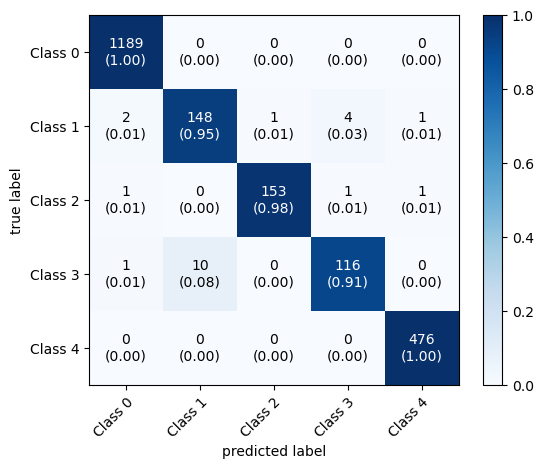

In [21]:
class_dict = {0: 'Class 0',
              1: 'Class 1',
              2: 'Class 2',
              3: 'Class 3',
              4: 'Class 4'}

multiclass = np.array([[1189,    0,    0,    0,    0],
                       [2,  148,    1,    4,    1],
                       [1,    0,  153,    1,    1],
                       [1,   10,    0,  116,    0],
                       [0,    0,    0,    0,  476]])

fig, ax = plot_confusion_matrix(
    conf_mat=multiclass,
    class_names=class_dict.values(),show_normed=True,colorbar=True)